In [175]:
import numpy as np
import pandas as pd

In [176]:
monkeypox = pd.read_csv("monkeypox.csv")
stored_df = monkeypox.copy ()
# monkeypox_followup = pd.read_csv("monkeypox-followup.csv")

In [265]:
print (monkeypox.shape)
print (monkeypox.columns)
print (monkeypox['binary_class'].value_counts ())
print (monkeypox['ternary_class'].value_counts ())

(5785, 21)
Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'binary_class', 'ternary_class', 'acc_age_in_days_at_post'],
      dtype='object')
0    4716
1    1069
Name: binary_class, dtype: int64
9    2752
0    1964
1    1069
Name: ternary_class, dtype: int64


Check Nan values

In [178]:
cols = monkeypox.columns
for col in cols:
  isna = monkeypox[col].isna().sum()
  if isna > 0:
    print (col, "--", monkeypox[col].isna().sum())

user location -- 2


In [179]:
monkeypox =  monkeypox.dropna()
monkeypox = monkeypox.reset_index()

In [180]:
for col in cols:
  isna = monkeypox[col].isna().sum()
  if isna > 0:
    print (col, "--", monkeypox[col].isna().sum())

See column stats

In [181]:
display(monkeypox.describe().round(2))

,index,number,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,binary_class,ternary_class
count,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00,5785.00
mean,2893.22,2906.21,2.74,1.04,13.88,0.87,36798.77,1837.22,60418.87,219.10,0.18,4.47
std,1670.55,1676.47,39.66,9.29,249.39,22.91,518438.25,9587.61,165595.49,2071.33,0.39,4.33
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,1447.00,1456.00,0.00,0.00,0.00,0.00,93.00,157.00,2916.00,0.00,0.00,0.00
50%,2893.00,2906.00,0.00,0.00,0.00,0.00,539.00,550.00,13805.00,3.00,0.00,1.00
75%,4340.00,4356.00,0.00,1.00,2.00,0.00,2730.00,1556.00,50862.00,26.00,0.00,9.00
max,5786.00,5810.00,2281.00,550.00,14561.00,1603.00,22126501.00,436979.00,2735137.00,72255.00,1.00,9.00


https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/ 

#Data Visualization

###Distribution Plots

In [182]:
# import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore the warnings
from warnings import filterwarnings
# importing pandas as pd
import pandas as pd

In [183]:
monkeypox['user is verified'] = monkeypox['user is verified'].replace({False: 0})
monkeypox['user is verified'] = monkeypox['user is verified'].replace({True: 1})

monkeypox['user has url'] = monkeypox['user has url'].replace({False: 0})
monkeypox['user has url'] = monkeypox['user has url'].replace({True: 1})

In [184]:
numerical_cols = ['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'binary_class', 'ternary_class']
text_cols = ['created at', 'user description', 'user created at', 'user location']

#####New Columns

In [185]:
monkeypox ['acc_age_in_days'] = 0
for i in range (len (monkeypox)):
  monkeypox ['acc_age_in_days'][i] = monkeypox['user created at'][i].split (' ')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [186]:
monkeypox ['post_age_in_days'] = 0
for i in range (len (monkeypox)):
  monkeypox ['post_age_in_days'][i] = monkeypox['created_at'][i].split (' ')[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [187]:
from datetime import datetime
monkeypox ['acc_age_in_days_at_post'] = 0
date_format = "%Y-%m-%d"
for i in range (len (monkeypox)):
  a = datetime.strptime(monkeypox ['acc_age_in_days'][i], date_format)
  b = datetime.strptime(monkeypox ['post_age_in_days'][i], date_format)
  delta = b - a
  monkeypox ['acc_age_in_days_at_post'][i] = delta.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [188]:
monkeypox ['acc_age_in_days_at_post'] 

0       3981
1       4831
2       1222
3       4889
4       5003
        ... 
5780      12
5781      12
5782     838
5783     125
5784    1023
Name: acc_age_in_days_at_post, Length: 5785, dtype: int64

In [189]:
monkeypox.drop ('post_age_in_days', axis=1, inplace = True)
monkeypox.drop ('acc_age_in_days', axis=1, inplace = True)
print (monkeypox.columns)

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'binary_class', 'ternary_class', 'acc_age_in_days_at_post'],
      dtype='object')


In [190]:
feats = monkeypox.columns.drop (['binary_class', 'ternary_class'])
labels = ['binary_class', 'ternary_class']

print (feats)

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'acc_age_in_days_at_post'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

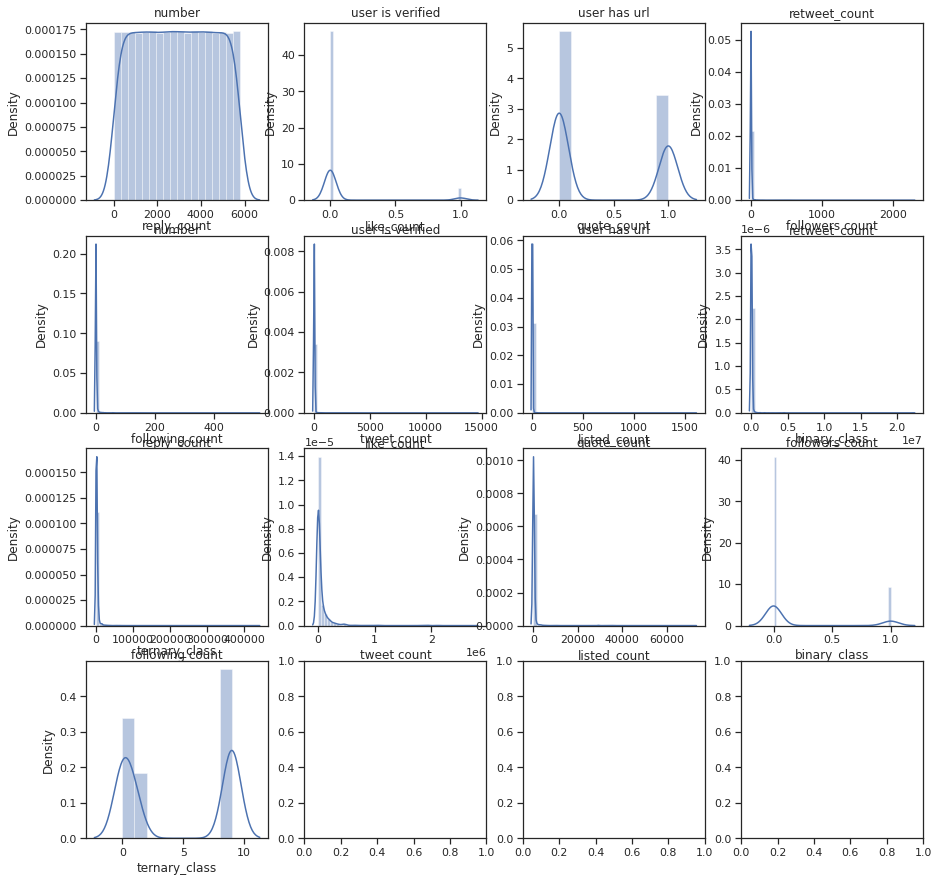

In [191]:
# check
fig, axes = plt.subplots(nrows = 4, ncols = 4)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, numerical_cols):
  sns.distplot(monkeypox[col], ax = ax)
  ax.set_title(col)

['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'binary_class']


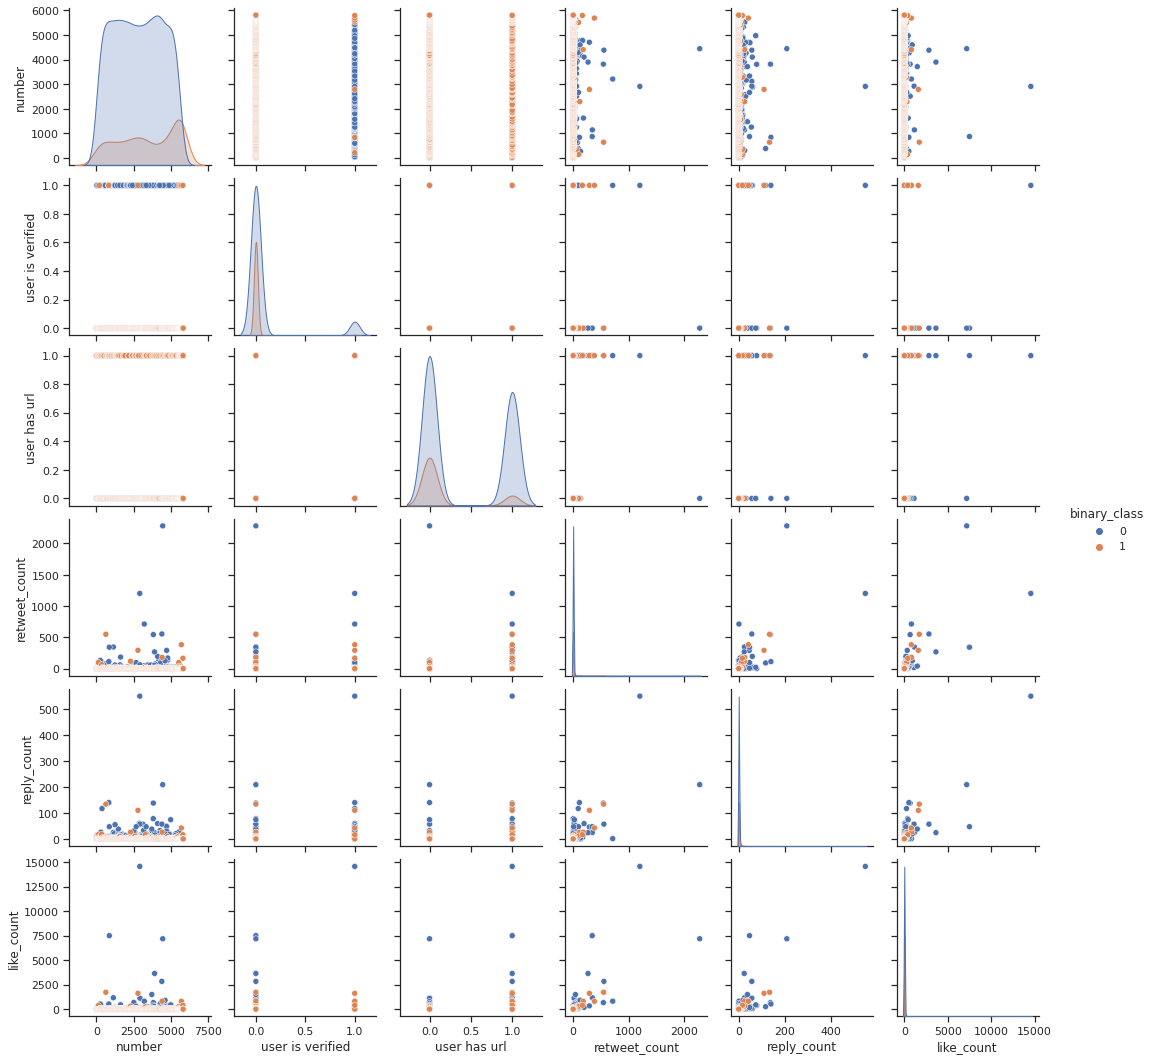

In [192]:
# plot scatteSr matrix using seaborn
# here four lists have been made instead of one/two, to make the plots easier to view/understand
numerical_cols1 = ['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'binary_class']
numerical_cols2 = ['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'binary_class']
numerical_cols3 = ['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'ternary_class']
numerical_cols4 = ['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'ternary_class']


col_list = numerical_cols1
print (col_list)

sns.set_theme(style="ticks")
sns.pairplot(monkeypox[col_list], hue='binary_class', diag_kind='kde')

['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'binary_class']


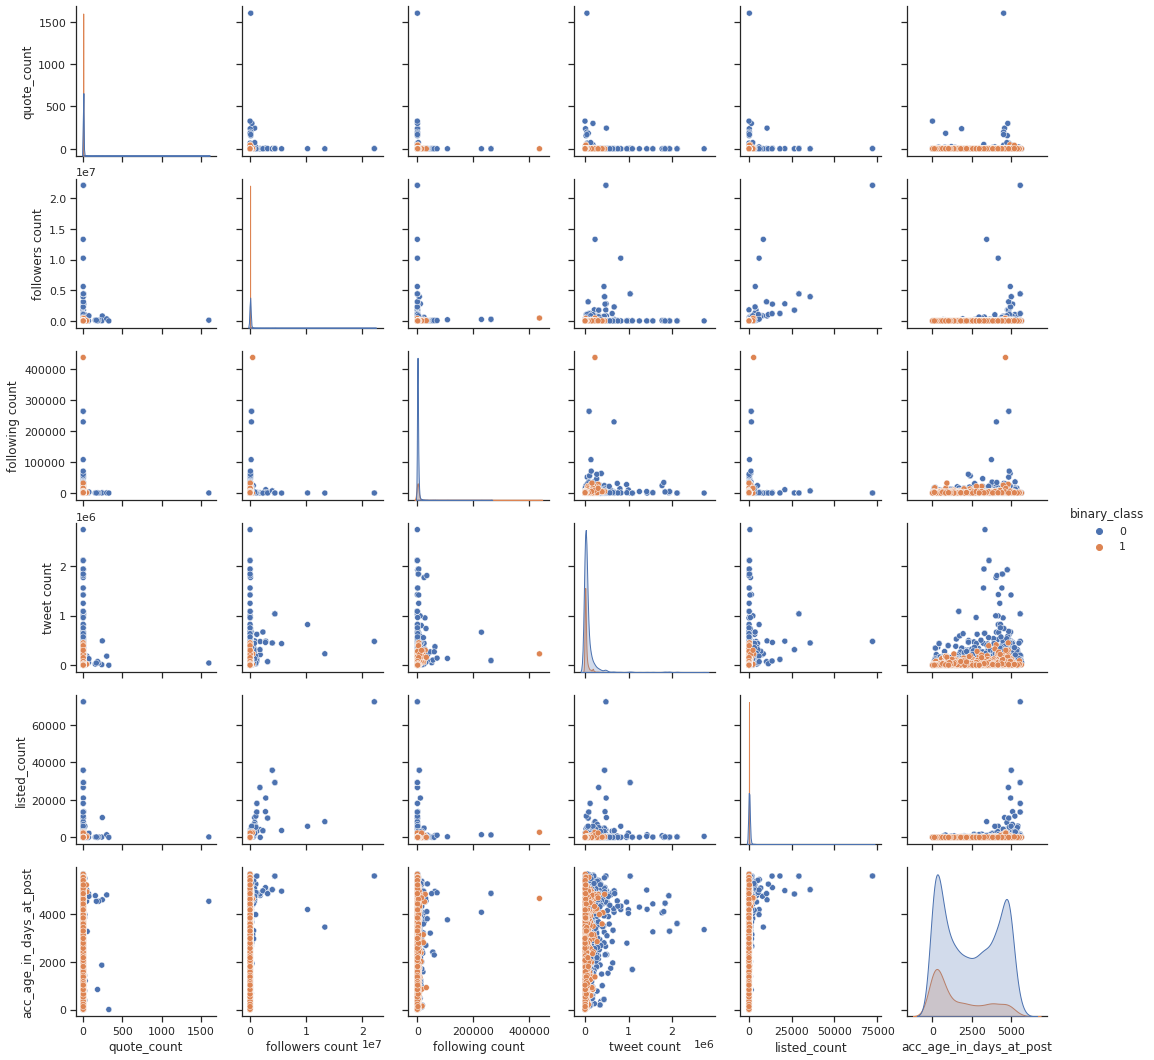

In [193]:
col_list = numerical_cols2
print (col_list)

sns.set_theme(style="ticks")
sns.pairplot(monkeypox[col_list], hue='binary_class', diag_kind='kde')

['number', 'user is verified', 'user has url', 'retweet_count', 'reply_count', 'like_count', 'ternary_class']


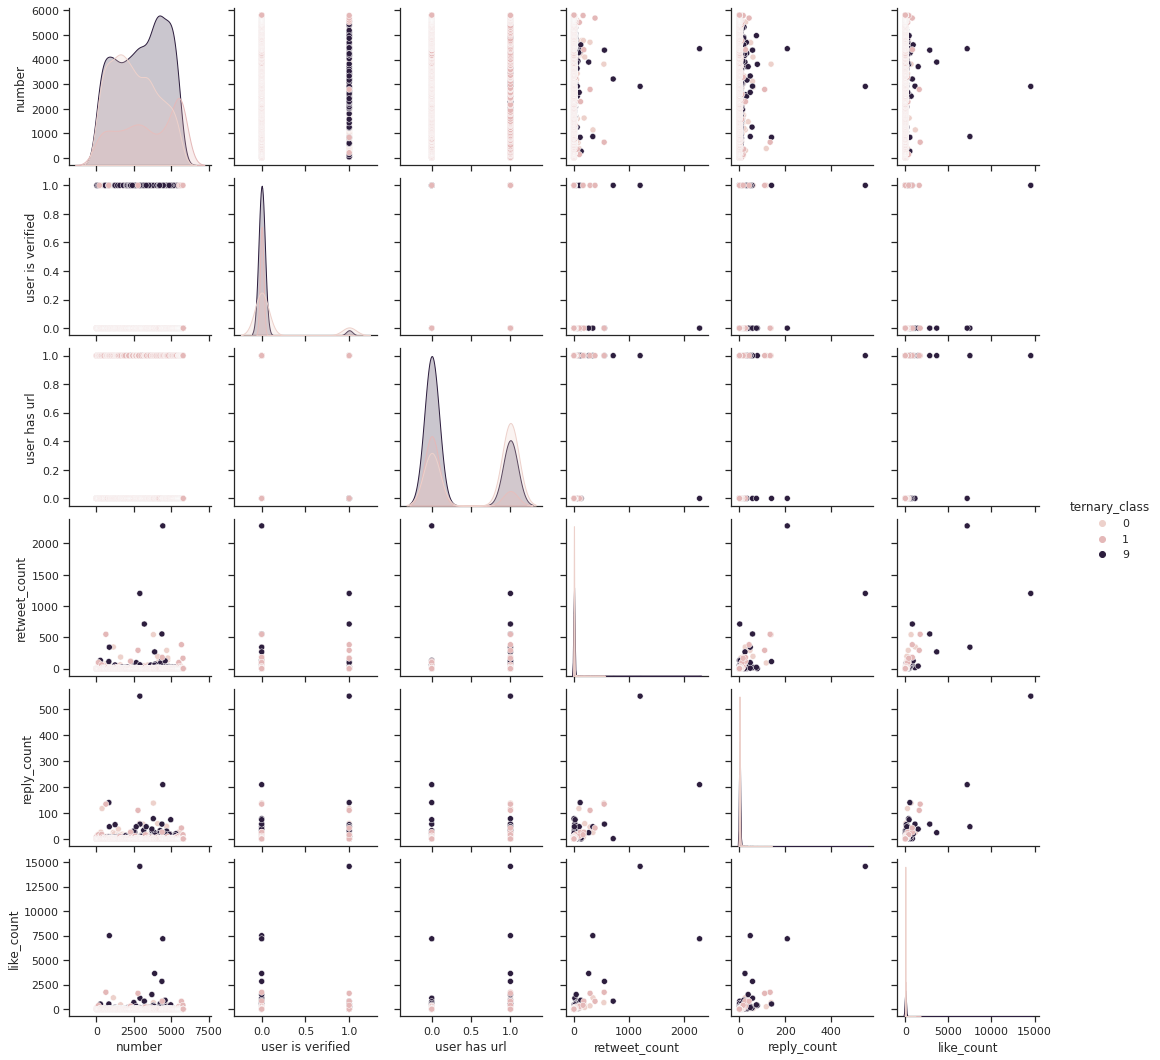

In [194]:
col_list = numerical_cols3
print (col_list)

sns.set_theme(style="ticks")
sns.pairplot(monkeypox[col_list], hue='ternary_class', diag_kind='kde')

['quote_count', 'followers count', 'following count', 'tweet count', 'listed_count', 'acc_age_in_days_at_post', 'ternary_class']


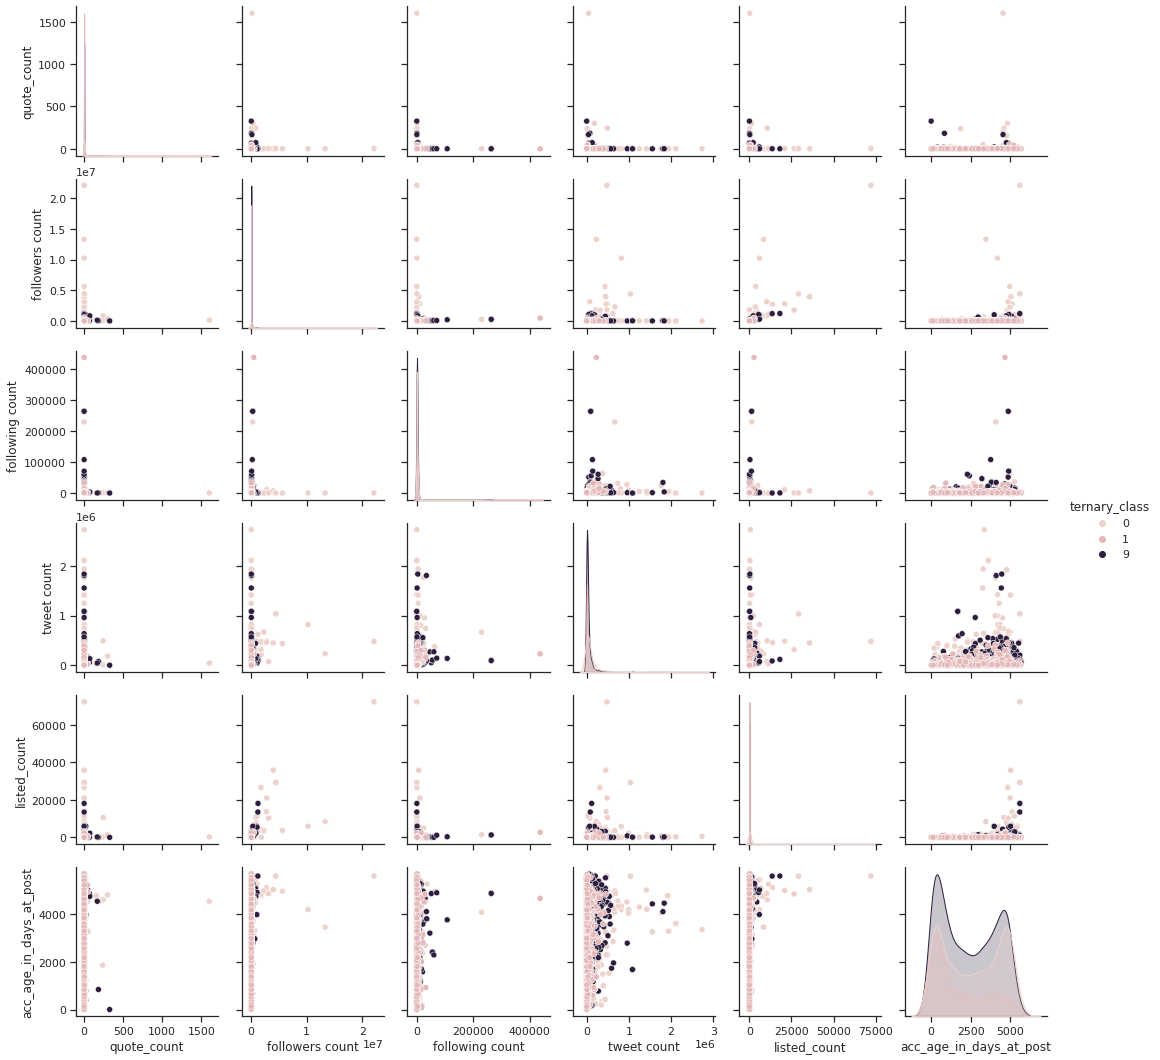

In [195]:
col_list = numerical_cols4
print (col_list)

sns.set_theme(style="ticks")
sns.pairplot(monkeypox[col_list], hue='ternary_class', diag_kind='kde') 

###Barplot

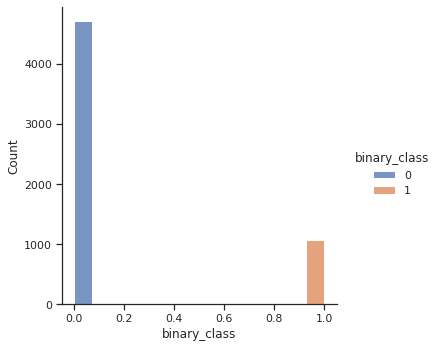

In [196]:
plt = sns.displot (data=monkeypox, x="binary_class", hue='binary_class', multiple="stack")

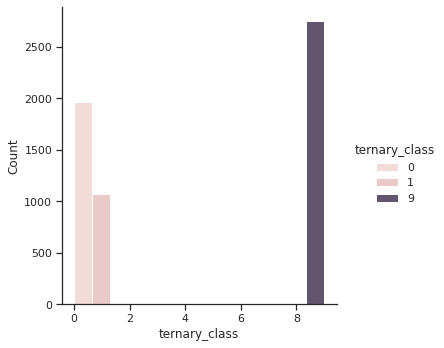

In [197]:
plt = sns.displot (data=monkeypox, x="ternary_class", hue='ternary_class', multiple="stack")

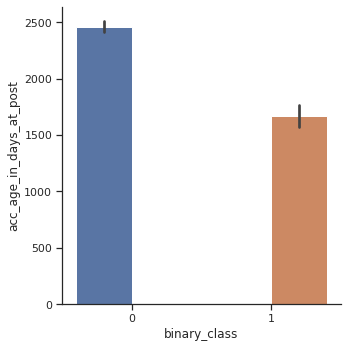

In [198]:
sns.catplot(x = "binary_class",       # x variable name
            y = "acc_age_in_days_at_post",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

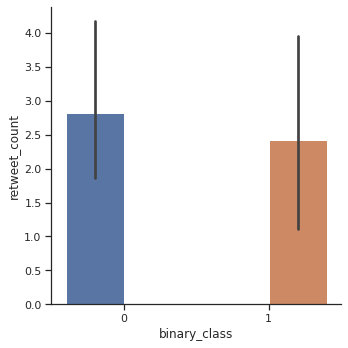

In [199]:
sns.catplot(x = "binary_class",       # x variable name
            y = "retweet_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

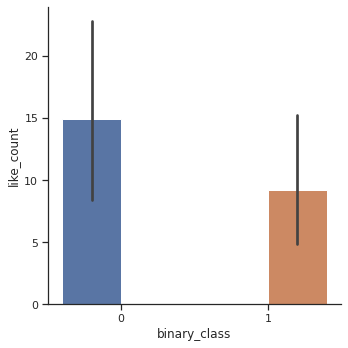

In [200]:
sns.catplot(x = "binary_class",       # x variable name
            y = "like_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

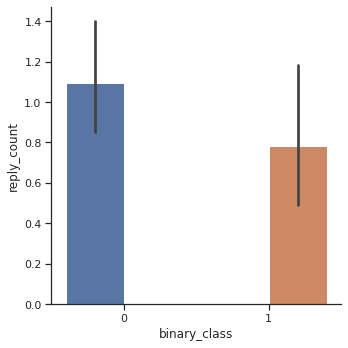

In [201]:
sns.catplot(x = "binary_class",       # x variable name
            y = "reply_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

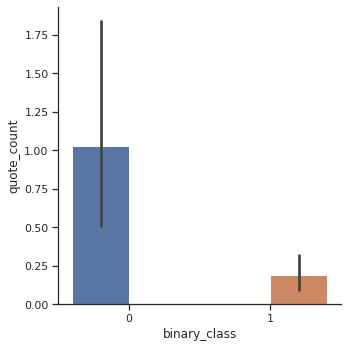

In [202]:
sns.catplot(x = "binary_class",       # x variable name
            y = "quote_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

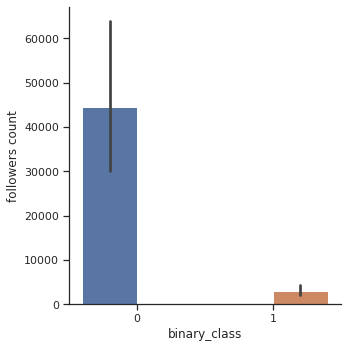

In [203]:
sns.catplot(x = "binary_class",       # x variable name
            y = "followers count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

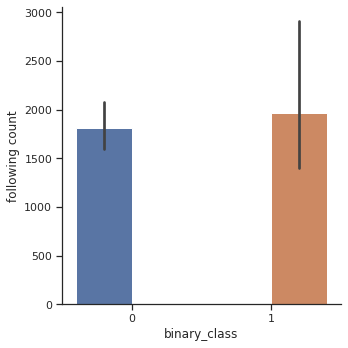

In [204]:
sns.catplot(x = "binary_class",       # x variable name
            y = "following count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

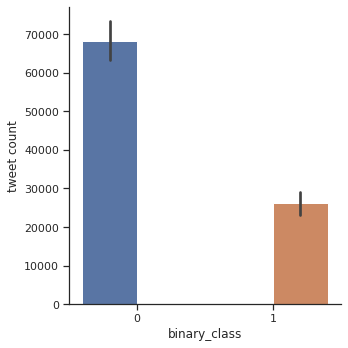

In [205]:
sns.catplot(x = "binary_class",       # x variable name
            y = "tweet count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

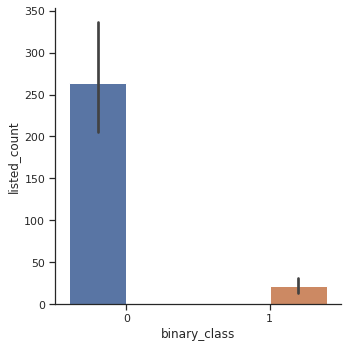

In [206]:
sns.catplot(x = "binary_class",       # x variable name
            y = "listed_count",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

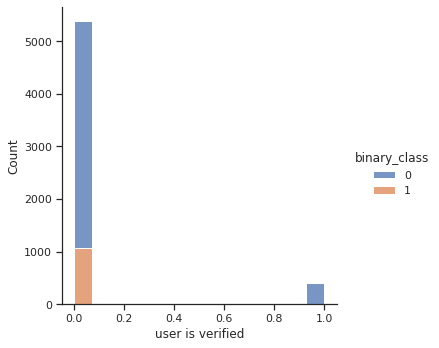

In [207]:
# for col in numerical_cols[:-2]:
plt = sns.displot (data=monkeypox, x="user is verified", hue="binary_class", multiple="stack")

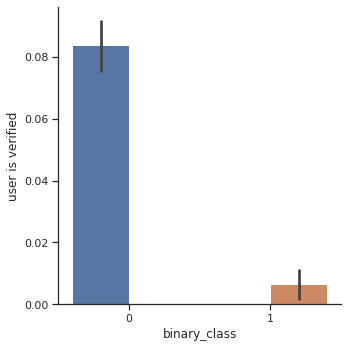

In [208]:
sns.catplot(x = "binary_class",       # x variable name
            y = "user is verified",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

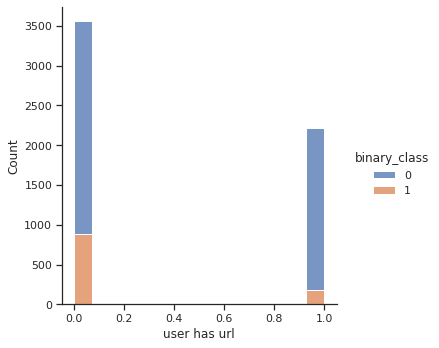

In [209]:
plt = sns.displot (data=monkeypox, x="user has url", hue="binary_class", multiple="stack")

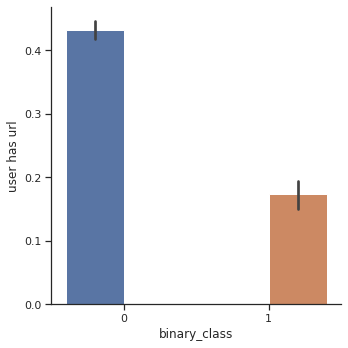

In [210]:
sns.catplot(x = "binary_class",       # x variable name
            y = "user has url",       # y variable name
            hue = "binary_class",  # group variable name
            data = monkeypox,     # dataframe to plot
            kind = "bar")

###Correlation

In [211]:
def correlation(df, method_name, bound): 
    print(method_name, " Correlation:\n")
    xCorr = df.corr(method = method_name).unstack()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.sort_values(kind="quicksort", ascending=False).drop_duplicates()
    print(xFlattened)
    print ('\n')
    return xFlattened

In [212]:
correlation (monkeypox, "spearman", bound=0.4)
correlation (monkeypox, "pearson", bound=0.4)
correlation (monkeypox, "kendall", bound=0.4)
# print (c[0][0])

spearman  Correlation:

listed_count             followers count            0.793397
following count          followers count            0.701459
index                    binary_class               0.672253
acc_age_in_days_at_post  listed_count               0.600950
tweet count              followers count            0.599132
like_count               retweet_count              0.578842
tweet count              listed_count               0.567290
ternary_class            index                      0.541721
acc_age_in_days_at_post  followers count            0.533131
listed_count             following count            0.509122
acc_age_in_days_at_post  tweet count                0.497579
like_count               reply_count                0.472039
index                    number                     0.466287
following count          tweet count                0.443998
quote_count              retweet_count              0.442782
followers count          like_count                 0.434146


followers count  listed_count               0.628649
binary_class     index                      0.548940
followers count  following count            0.528782
like_count       retweet_count              0.525456
listed_count     acc_age_in_days_at_post    0.444866
followers count  tweet count                0.429888
quote_count      retweet_count              0.425161
like_count       reply_count                0.424148
tweet count      listed_count               0.416631
dtype: float64

###Outliers

https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

Old Shape:  (5785, 21)


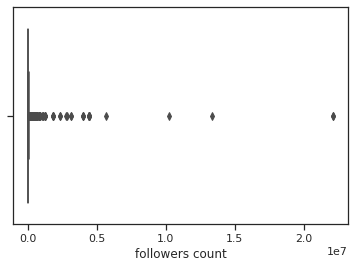

In [222]:
# one feature as example
new_df = monkeypox.copy ()
print("Old Shape: ", new_df.shape)  
col = 'followers count'
sns.boxplot(x=col, data=new_df)

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'acc_age_in_days_at_post'],
      dtype='object')
New Shape:  (4932, 21)


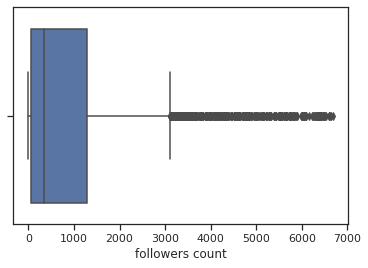

In [223]:
print (feats)
col = 'followers count'

# IQR
Q1 = np.percentile(new_df[col], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(new_df[col], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  

  
# Upper bound
upper = np.where(new_df[col] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(new_df[col] <= (Q1-1.5*IQR))
  
# Removing the Outliers
new_df.drop(upper[0], inplace = True)
new_df.drop(lower[0], inplace = True)
  
print("New Shape: ", new_df.shape)
  
sns.boxplot(x=col, data=new_df)

###Replicating as Paper

Number od retweets per tweet (who has at least one retweet)

In [235]:
print (monkeypox.shape)
df1 = monkeypox[monkeypox['retweet_count'] > 0] 
print (df1.shape)
df1 = df1.reset_index ()

(5785, 21)
(1212, 21)


In [237]:
df1['retweet_count_per_tweet'] = df1['retweet_count']/df1['number']
print (df1['retweet_count_per_tweet'])

0       0.111111
1       0.064516
2       0.030303
3       0.081081
4       0.153846
          ...   
1207    0.000518
1208    0.028650
1209    0.000173
1210    0.001034
1211    0.000172
Name: retweet_count_per_tweet, Length: 1212, dtype: float64


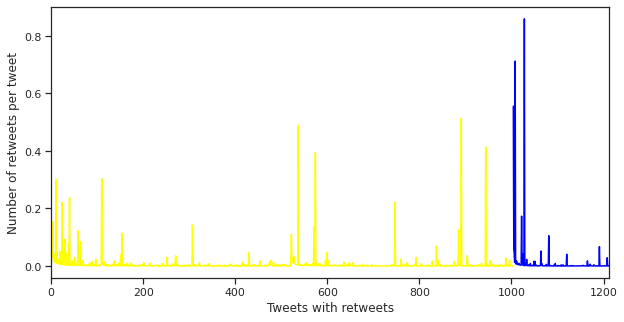

In [258]:
df2 = df1[df1['binary_class'] == 0]
df3 = df1[df1['binary_class'] == 1]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlim(0, df1.shape[0])
plt.xlabel('Tweets with retweets')
plt.ylabel('Number of retweets per tweet')
plt.plot(df2.index, df2['retweet_count_per_tweet'], color='yellow')
plt.plot(df3.index, df3['retweet_count_per_tweet'], color='blue')
plt.show()


binary_class
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

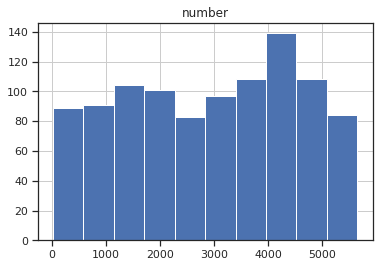

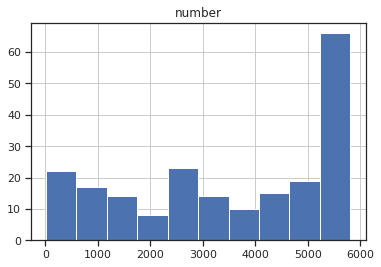

In [263]:
df1.groupby("binary_class").hist (column='number')

###Covariance, Eigen vectors

In [214]:
# standard scalar
from sklearn.preprocessing import StandardScaler

print (feats)
scaler = StandardScaler()
# standardized_train_x = scaler.fit_transform(new_train [feat])

# covariance

Index(['index', 'number', 'created_at', 'text', 'source', 'user is verified',
       'user has url', 'user description', 'user created at', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'followers count',
       'following count', 'tweet count', 'listed_count', 'user location',
       'acc_age_in_days_at_post'],
      dtype='object')
